# Install Libraries

Please install Homebrew if you're running on OSX.  You will need it to get pygraphviz to install correctly.

In [1]:
# pip install networkx NumPy SciPy Matplotlib PyYAML

# brew install graphviz
# pip install --global-option=build_ext --global-option="-I/usr/local/Cellar/graphviz/2.38.0/include/"  --global-option="-L/usr/local/Cellar/graphviz/2.38.0/lib/" pygraphviz


In [2]:
import networkx as nx
from networkx.readwrite import json_graph

# Create a graph

In [3]:
G = nx.Graph()

## Create a graph with an attribute

In [4]:
G = nx.Graph(day="Friday")
G.graph

{'day': 'Friday'}

### Modify the attribute later

In [5]:
G.graph['day'] = 'Monday'
G.graph

{'day': 'Monday'}

## Add nodes to the graph

In [6]:
G.add_node(1)

# Alternatively add nodes using strings
G.add_node('House Security')

### Add a list of nodes to the graph

In [7]:
G.add_nodes_from([2,3])

### Or add any 'nbunches' of nodes 

In [8]:
H = nx.path_graph(10)
G.add_nodes_from(H)

## Add edges to the graph

In [9]:
G.add_edge(1,2)
e = (2,3)
G.add_edge(*e)

### Add a list of edges

In [10]:
G.add_edges_from([
        (1,2),
        (1,3)
    ])

### Display graph data

In [11]:
print G.number_of_nodes()

print G.number_of_edges()

11
3


# Draw a graph

In [12]:
import matplotlib.pyplot as plt

In [13]:
nx.draw(G)
plt.show()

# Directed Graphs

In [14]:
dg = nx.DiGraph()
nodes = ['House Security',
         'Garage Security',
         'Material',
         'Uniqueness of Opener',
         'Window Security',
         'Material',
         'Location and Height',
         'Latched',
         'Door Security',
         'Locked',
         'Spare Key',
         'Homeowner',
         'Location',
         'Fence Security',
         'Height',
         'Neighborhood',
         'Awareness of Neighbors',
         'Traffic on Street',
         'Number of Houses']
edges = [
    ('Garage Security','House Security'),
    ('Material','Garage Security'),
    ('Uniqueness of Opener','Garage Security'),
    ('Window Security','House Security'),
    ('Material','Window Security'),
    ('Location and Height','Window Security'),
    ('Latched','Window Security'),
    ('Door Security','House Security'),
    ('Locked','Door Security'),
    ('Spare Key','Door Security'),
    ('Homeowner','Spare Key'),
    ('Homeowner','Locked'),
    ('Homeowner','Latched'),
    ('Location','Door Security'),
    ('Material','Door Security'),
    ('Fence Security','House Security'),
    ('Material','Fence Security'),
    ('Height','Fence Security'),
    ('Neighborhood','House Security'),
    ('Awareness of Neighbors','Neighborhood'),
    ('Traffic on Street','Neighborhood'),
    ('Number of Houses','Neighborhood')]
dg.add_nodes_from(nodes)
dg.add_edges_from(edges)

In [ ]:
nx.draw(dg)
plt.show()

## Convert graph to a GraphViz object (for better visualizations)

GraphViz supports the following layout types:
 - **dot** : "heirerchican" or layed drawings of directed graphs.  This is the default to use if edges have direction.
 - **neato** : "spring model" layouts.  This is the default tool to use if the graph is not too large (about 100 nodes) and you don't know anything else about it.  Neato attempts to minimize a global energy function, which is equivalent to statistical multi-dimensional scaling.
 - **fdp** : "spring model" layouts similart to those of neato, but does this by reducing forces rather than working with energy.
 - **sfdp** : multiscale version of fdp for the layout of large graphs.
 - **twopi** : radial layouts, after Graham Will 97.  Nodes are placed on concentric circles depending on their distance from a given root node.
 - **circo** : circular layout, after Six and Tollis 99, Kauffman and Wiese 02.  This is suitable for certain diagrams 
of multiple cyclic structures such as certain telecommunications networks.

In [15]:
#from networkx.drawing.nx_agraph import *
graphFile = 'test.png'
A = nx.drawing.nx_agraph.to_agraph(dg)
A.layout(prog='dot')
A.draw(graphFile)

### Open the image in Ipython

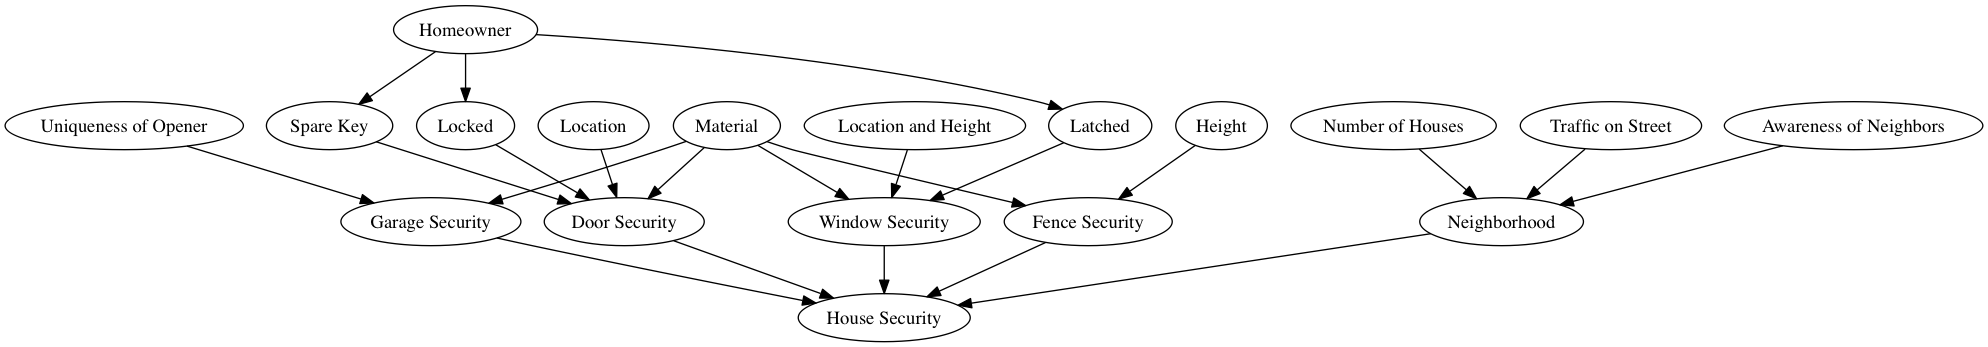

In [16]:
from IPython.display import Image, display
display(Image(graphFile))

### Output graph to YAML structure

In [17]:
nx.write_yaml(dg,'test.yaml')

# Graph Measurements

## Katz Centrality

Katz centrality[30] is a generalization of degree centrality. Degree centrality measures the number of direct neighbors, and Katz centrality measures the number of all nodes that can be connected through a path, while the contributions of distant nodes are penalized.  Katz centrality can be viewed as a variant of eigenvector centrality.

<a href="https://en.wikipedia.org/wiki/Centrality">Source</a>



In [18]:
import math
phi = (1 + math.sqrt(5))/2.0 # largest eigenvalue of adj matrix
centrality = nx.katz_centrality(dg,1/phi-0.01)
for n,c in sorted(centrality.items()):
    print("%s %0.2f"%(n,c))

Awareness of Neighbors 0.08
Door Security 0.33
Fence Security 0.18
Garage Security 0.18
Height 0.08
Homeowner 0.08
House Security 0.78
Latched 0.13
Location 0.08
Location and Height 0.08
Locked 0.13
Material 0.08
Neighborhood 0.22
Number of Houses 0.08
Spare Key 0.13
Traffic on Street 0.08
Uniqueness of Opener 0.08
Window Security 0.25


## Degree Centrality

Historically first and conceptually simplest is degree centrality, which is defined as the number of links incident upon a node (i.e., the number of ties that a node has). The degree can be interpreted in terms of the immediate risk of a node for catching whatever is flowing through the network (such as a virus, or some information). In the case of a directed network (where ties have direction), we usually define two separate measures of degree centrality, namely indegree and outdegree. Accordingly, indegree is a count of the number of ties directed to the node and outdegree is the number of ties that the node directs to others. When ties are associated to some positive aspects such as friendship or collaboration, indegree is often interpreted as a form of popularity, and outdegree as gregariousness.
<a href="https://en.wikipedia.org/wiki/Centrality">Source</a>

In [19]:
centrality = nx.degree_centrality(dg)
for n,c in sorted(centrality.items()):
    print("%s %0.2f"%(n,c))

Awareness of Neighbors 0.06
Door Security 0.29
Fence Security 0.18
Garage Security 0.18
Height 0.06
Homeowner 0.18
House Security 0.29
Latched 0.12
Location 0.06
Location and Height 0.06
Locked 0.12
Material 0.24
Neighborhood 0.24
Number of Houses 0.06
Spare Key 0.12
Traffic on Street 0.06
Uniqueness of Opener 0.06
Window Security 0.24


## In-Degree Centrality

In [20]:
centrality = nx.in_degree_centrality(dg)
for n,c in sorted(centrality.items()):
    print("%s %0.2f"%(n,c))

Awareness of Neighbors 0.00
Door Security 0.24
Fence Security 0.12
Garage Security 0.12
Height 0.00
Homeowner 0.00
House Security 0.29
Latched 0.06
Location 0.00
Location and Height 0.00
Locked 0.06
Material 0.00
Neighborhood 0.18
Number of Houses 0.00
Spare Key 0.06
Traffic on Street 0.00
Uniqueness of Opener 0.00
Window Security 0.18


## Out-Degree Centrality

In [21]:
centrality = nx.out_degree_centrality(dg)
for n,c in sorted(centrality.items()):
    print("%s %0.2f"%(n,c))

Awareness of Neighbors 0.06
Door Security 0.06
Fence Security 0.06
Garage Security 0.06
Height 0.06
Homeowner 0.18
House Security 0.00
Latched 0.06
Location 0.06
Location and Height 0.06
Locked 0.06
Material 0.24
Neighborhood 0.06
Number of Houses 0.06
Spare Key 0.06
Traffic on Street 0.06
Uniqueness of Opener 0.06
Window Security 0.06


## Closeness Centrality

In the classic definition of the closeness centrality, the spread of information is modeled by the use of shortest paths. This model might not be the most realistic for all types of communication scenarios. Thus, related definitions have been discussed to measure closeness, like the random walk closeness centrality introduced by Noh and Rieger (2004). It measures the speed with which randomly walking messages reach a vertex from elsewhere in the graph—a sort of random-walk version of closeness centrality.[24] Hierarchical closeness of Tran and Kwon (2014)[25] is an extended closeness centrality to deal still in another way with the limitation of closeness in graphs that are not strongly connected. The hierarchical closeness explicitly includes information about the range of other nodes that can be affected by the given node. <a href="https://en.wikipedia.org/wiki/Centrality">Source</a>

In [22]:
centrality = nx.closeness_centrality(dg)
for n,c in sorted(centrality.items()):
    print("%s %0.2f"%(n,c))

Awareness of Neighbors 0.08
Door Security 0.06
Fence Security 0.06
Garage Security 0.06
Height 0.08
Homeowner 0.21
House Security 0.00
Latched 0.08
Location 0.08
Location and Height 0.08
Locked 0.08
Material 0.25
Neighborhood 0.06
Number of Houses 0.08
Spare Key 0.08
Traffic on Street 0.08
Uniqueness of Opener 0.08
Window Security 0.06


## Betweenness Centrality

Betweenness centrality quantifies the number of times a node acts as a bridge along the shortest path between two other nodes. It was introduced as a measure for quantifying the control of a human on the communication between other humans in a social network by Linton Freeman[26] In his conception, vertices that have a high probability to occur on a randomly chosen shortest path between two randomly chosen vertices have a high betweenness. <a href="https://en.wikipedia.org/wiki/Centrality">Source</a>

In [23]:
centrality = nx.betweenness_centrality(dg)
for n,c in sorted(centrality.items()):
    print("%s %0.2f"%(n,c))

Awareness of Neighbors 0.00
Door Security 0.01
Fence Security 0.00
Garage Security 0.00
Height 0.00
Homeowner 0.00
House Security 0.00
Latched 0.00
Location 0.00
Location and Height 0.00
Locked 0.00
Material 0.00
Neighborhood 0.01
Number of Houses 0.00
Spare Key 0.00
Traffic on Street 0.00
Uniqueness of Opener 0.00
Window Security 0.01


## Edge Betweenness Centrality

In [24]:
centrality = nx.edge_betweenness_centrality(dg)
for n,c in sorted(centrality.items()):
    print("%s %0.2f"%(n,c))

('Awareness of Neighbors', 'Neighborhood') 0.01
('Door Security', 'House Security') 0.02
('Fence Security', 'House Security') 0.01
('Garage Security', 'House Security') 0.01
('Height', 'Fence Security') 0.01
('Homeowner', 'Latched') 0.01
('Homeowner', 'Locked') 0.01
('Homeowner', 'Spare Key') 0.01
('Latched', 'Window Security') 0.01
('Location', 'Door Security') 0.01
('Location and Height', 'Window Security') 0.01
('Locked', 'Door Security') 0.01
('Material', 'Door Security') 0.00
('Material', 'Fence Security') 0.00
('Material', 'Garage Security') 0.00
('Material', 'Window Security') 0.00
('Neighborhood', 'House Security') 0.01
('Number of Houses', 'Neighborhood') 0.01
('Spare Key', 'Door Security') 0.01
('Traffic on Street', 'Neighborhood') 0.01
('Uniqueness of Opener', 'Garage Security') 0.01
('Window Security', 'House Security') 0.01
